<a href="https://colab.research.google.com/github/ArpitPatel161989/Novel-Corona-Virus/blob/main/Novel_Corona_virus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
from matplotlib import ticker 
import pandas as pd 
import random
import math
import time
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
plt.style.use('seaborn')
%matplotlib inline 

# To download latest data
## https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset/data

In [ ]:
# Laoding all 3 data set into my project

confirmed_case = pd.read_csv('/content/drive/MyDrive/Machine Learning/Corona Virus Report/10-08-2020-Dataset/time_series_covid_19_confirmed.csv')

In [ ]:
death_reported = pd.read_csv('/content/drive/MyDrive/Machine Learning/Corona Virus Report/10-08-2020-Dataset/time_series_covid_19_deaths.csv')

In [ ]:
recovered_cases = pd.read_csv('/content/drive/MyDrive/Machine Learning/Corona Virus Report/10-08-2020-Dataset/time_series_covid_19_recovered.csv')

In [ ]:
# display datasets of the all 3 dataset
confirmed_case.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,31836,32022,32324,32672,32951,33190,33384,33594,33908,34194,34366,34451,34455,34740,34994,35070,35229,35301,35475,35526,35615,35727,35928,35981,36036,36157,36263,36368,36471,36542,36675,36710,36710,36747,36782,36829,36896,37015,37054,37054
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2580,2662,2752,2819,2893,2964,3038,3106,3188,3278,3371,3454,3571,3667,3752,3851,3906,4008,4090,4171,4290,4358,4466,4570,4637,4763,4880,4997,5105,5197,5276,5396,5519,5620,5750,5889,6016,6151,6275,6411
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,14272,14657,15070,15500,15941,16404,16879,17348,17808,18242,18712,19195,19689,20216,20770,21355,21948,22549,23084,23691,24278,24872,25484,26159,26764,27357,27973,28615,29229,29831,30394,30950,31465,31972,32504,33055,33626,34155,34693,35160
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,855,855,855,855,855,855,855,855,855,855,855,855,858,861,862,877,880,880,880,884,884,889,889,897,897,897,907,907,918,922,925,925,925,937,939,939,944,955,955,955
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,291,315,328,346,346,346,386,386,396,458,462,506,525,541,576,607,638,687,705,749,779,812,851,880,916,932,950,1000,1078,1109,1148,1164,1199,1280,1344,1395,1483,1538,1572,1672


In [ ]:
death_reported.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,774,807,819,826,864,898,920,936,957,971,994,1010,1012,1048,1094,1113,1147,1164,1181,1185,1186,1190,1211,1225,1248,1259,1269,1270,1271,1271,1272,1283,1284,1288,1288,1294,1298,1307,1312,1312
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,65,69,72,74,76,79,81,83,83,85,89,93,95,97,101,104,107,111,112,113,117,120,123,128,134,138,144,148,150,154,157,161,166,172,176,182,188,189,193,199
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,920,928,937,946,952,959,968,978,988,996,1004,1011,1018,1028,1040,1052,1057,1068,1078,1087,1100,1111,1124,1136,1146,1155,1163,1174,1186,1200,1210,1223,1231,1239,1248,1261,1273,1282,1293,1302
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15,17,18,19,19,19,21,21,22,23,23,26,26,26,27,28,29,29,29,29,30,33,33,35,39,40,41,47,48,51,52,54,55,58,59,62,64,67,70,75


In [ ]:
recovered_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15651,16041,17331,19164,19366,20103,20179,20700,20847,20882,21135,21216,21254,21454,22456,22824,23151,23273,23634,23741,23741,23924,24550,24602,24793,25180,25198,25358,25389,25471,25509,25509,25510,25669,25669,25742,25840,25903,25960,25960
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1516,1559,1592,1637,1657,1702,1744,1791,1832,1875,1881,1946,2014,2062,2091,2137,2214,2264,2311,2352,2397,2463,2523,2608,2637,2682,2745,2789,2830,2883,2952,2961,3018,3031,3031,3123,3155,3227,3268,3342
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,10040,10342,10832,11181,11492,11884,12094,12329,12637,13124,13124,13743,14019,14295,14792,15107,15430,15744,16051,16400,16646,16983,17369,17369,18076,18088,18837,19233,19592,20082,20537,20988,21419,21901,22375,22802,23238,23667,24083,24506
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,799,800,800,800,800,800,800,802,802,803,803,803,803,803,803,803,803,803,803,803,803,803,803,803,803,803,803,803,804,806,807,807,807,821,825,825,828,839,839,839
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,97,97,107,108,108,108,117,117,117,117,118,118,118,118,124,124,199,210,221,221,221,221,236,241,242,242,242,266,301,395,437,460,461,476,503,506,520,544,564,567


In [ ]:
columns = confirmed_case.keys()
columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '7/31/20', '8/1/20', '8/2/20', '8/3/20', '8/4/20', '8/5/20', '8/6/20',
       '8/7/20', '8/8/20', '8/9/20'],
      dtype='object', length=205)

In [ ]:
# Extract only dates columns from the column list by loc
confirmed = confirmed_case.loc[:, columns[4]:columns[-1]]
deaths = death_reported.loc[:, columns[4]:columns[-1]]
recoveries = recovered_cases.loc[:, columns[4]:columns[-1]]

In [ ]:
confirmed.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,31836,32022,32324,32672,32951,33190,33384,33594,33908,34194,34366,34451,34455,34740,34994,35070,35229,35301,35475,35526,35615,35727,35928,35981,36036,36157,36263,36368,36471,36542,36675,36710,36710,36747,36782,36829,36896,37015,37054,37054
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2580,2662,2752,2819,2893,2964,3038,3106,3188,3278,3371,3454,3571,3667,3752,3851,3906,4008,4090,4171,4290,4358,4466,4570,4637,4763,4880,4997,5105,5197,5276,5396,5519,5620,5750,5889,6016,6151,6275,6411
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,14272,14657,15070,15500,15941,16404,16879,17348,17808,18242,18712,19195,19689,20216,20770,21355,21948,22549,23084,23691,24278,24872,25484,26159,26764,27357,27973,28615,29229,29831,30394,30950,31465,31972,32504,33055,33626,34155,34693,35160
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,855,855,855,855,855,855,855,855,855,855,855,855,858,861,862,877,880,880,880,884,884,889,889,897,897,897,907,907,918,922,925,925,925,937,939,939,944,955,955,955
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,291,315,328,346,346,346,386,386,396,458,462,506,525,541,576,607,638,687,705,749,779,812,851,880,916,932,950,1000,1078,1109,1148,1164,1199,1280,1344,1395,1483,1538,1572,1672


In [ ]:
# we are going to find the total Confirm cases, Death cases and Recovered cases and appending in 4 empty list
# We are also calculating total mortality rates which is death_sum/confirmed cases

dates = confirmed.keys()
world_casese = []  # This is a  total of each day
total_deaths = []  # This is total deaths of each day
mortality_rates = [] 
total_recovered = [] # This is total recovered of each day

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recover_sum = recoveries[i].sum()
    world_casese.append(confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rates.append(death_sum/confirmed_sum)
    total_recovered.append(recover_sum)

In [ ]:
# Display all the new created lists
confirmed_sum

19861683

In [ ]:
death_sum

731326

In [ ]:
recover_sum

12115825

In [ ]:
world_casese

[555,
 654,
 941,
 1434,
 2118,
 2927,
 5578,
 6166,
 8234,
 9927,
 12038,
 16787,
 19887,
 23898,
 27643,
 30802,
 34395,
 37129,
 40159,
 42768,
 44810,
 45228,
 60381,
 66908,
 69050,
 71234,
 73269,
 75151,
 75651,
 76211,
 76840,
 78601,
 78981,
 79545,
 80398,
 81375,
 82739,
 84116,
 86011,
 88395,
 90369,
 92947,
 95246,
 98037,
 101980,
 106018,
 109972,
 113872,
 118896,
 126559,
 132309,
 146716,
 157824,
 168973,
 183640,
 199487,
 219083,
 247002,
 276612,
 308921,
 342341,
 384508,
 425675,
 476494,
 539391,
 603791,
 671447,
 731024,
 795666,
 872076,
 948290,
 1029704,
 1112859,
 1193322,
 1265035,
 1337712,
 1414580,
 1498360,
 1585025,
 1672620,
 1749575,
 1846390,
 1916063,
 1985901,
 2066740,
 2163426,
 2251145,
 2325103,
 2405607,
 2478960,
 2554241,
 2631027,
 2720027,
 2806972,
 2891910,
 2964853,
 3033572,
 3108878,
 3185925,
 3269608,
 3356663,
 3438339,
 3515957,
 3592058,
 3672050,
 3762073,
 3851158,
 3942676,
 4028522,
 4104768,
 4181009,
 4264584,
 4349360

In [ ]:
total_deaths

[17,
 18,
 26,
 42,
 56,
 82,
 131,
 133,
 171,
 213,
 259,
 362,
 426,
 492,
 564,
 634,
 719,
 806,
 906,
 1013,
 1113,
 1118,
 1371,
 1523,
 1666,
 1770,
 1868,
 2008,
 2123,
 2248,
 2252,
 2459,
 2470,
 2630,
 2710,
 2771,
 2814,
 2873,
 2942,
 2996,
 3085,
 3160,
 3255,
 3348,
 3460,
 3559,
 3803,
 3987,
 4266,
 4611,
 4916,
 5413,
 5830,
 6471,
 7151,
 7956,
 8855,
 9962,
 11442,
 13149,
 14850,
 16772,
 19047,
 21828,
 24843,
 28370,
 32069,
 35549,
 39727,
 44602,
 50183,
 56515,
 62522,
 68406,
 73490,
 79393,
 87364,
 94166,
 101872,
 109196,
 115343,
 121153,
 126978,
 133930,
 142302,
 149645,
 158589,
 165120,
 169737,
 175216,
 182420,
 189220,
 196101,
 202812,
 208436,
 212356,
 217047,
 223533,
 230316,
 236306,
 241505,
 246966,
 250444,
 254592,
 260478,
 267052,
 272477,
 278066,
 282340,
 285921,
 289396,
 294953,
 300194,
 305471,
 310706,
 314870,
 318205,
 321502,
 326290,
 331186,
 335983,
 341271,
 345269,
 348415,
 349603,
 353816,
 359038,
 363749,
 368496,


In [ ]:
total_recovered

[28,
 30,
 36,
 39,
 52,
 61,
 107,
 126,
 143,
 222,
 284,
 472,
 623,
 852,
 1124,
 1487,
 2011,
 2616,
 3244,
 3946,
 4683,
 5150,
 6295,
 8058,
 9395,
 10865,
 12583,
 14352,
 16121,
 18177,
 18890,
 22886,
 23394,
 25227,
 27905,
 30384,
 33277,
 36711,
 39782,
 42716,
 45602,
 48228,
 51170,
 53796,
 55865,
 58359,
 60694,
 62493,
 64404,
 67002,
 68324,
 70251,
 72622,
 76032,
 78086,
 80838,
 83321,
 84958,
 87403,
 91670,
 97885,
 98351,
 107992,
 113775,
 122145,
 130921,
 139424,
 148891,
 164337,
 177825,
 192918,
 209967,
 225415,
 245832,
 259672,
 276252,
 299643,
 328359,
 353707,
 375509,
 401766,
 421180,
 448347,
 473436,
 510106,
 540926,
 567049,
 590968,
 622623,
 644613,
 679456,
 709881,
 738661,
 788712,
 816491,
 845096,
 872865,
 906136,
 948318,
 1013284,
 1051537,
 1092416,
 1124732,
 1158819,
 1195359,
 1241365,
 1280833,
 1317383,
 1370933,
 1404527,
 1451521,
 1488542,
 1544398,
 1584114,
 1632122,
 1688714,
 1729621,
 1782542,
 1834647,
 1893575,
 19448

In [ ]:
# Converting all the dates and cases in the form of numpy array

days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1,1)
world_casese = np.array(world_casese).reshape(-1,1)
total_deaths = np.array(total_deaths).reshape(-1,1)
total_recovered = np.array(total_recovered).reshape(-1,1)

In [ ]:
days_since_1_22

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [ ]:
world_casese

array([[     555],
       [     654],
       [     941],
       [    1434],
       [    2118],
       [    2927],
       [    5578],
       [    6166],
       [    8234],
       [    9927],
       [   12038],
       [   16787],
       [   19887],
       [   23898],
       [   27643],
       [   30802],
       [   34395],
       [   37129],
       [   40159],
       [   42768],
       [   44810],
       [   45228],
       [   60381],
       [   66908],
       [   69050],
       [   71234],
       [   73269],
       [   75151],
       [   75651],
       [   76211],
       [   76840],
       [   78601],
       [   78981],
       [   79545],
       [   80398],
       [   81375],
       [   82739],
       [   84116],
       [   86011],
       [   88395],
       [   90369],
       [   92947],
       [   95246],
       [   98037],
       [  101980],
       [  106018],
       [  109972],
       [  113872],
       [  118896],
       [  126559],
       [  132309],
       [  146716],
       [  15

In [ ]:
total_deaths

array([[    17],
       [    18],
       [    26],
       [    42],
       [    56],
       [    82],
       [   131],
       [   133],
       [   171],
       [   213],
       [   259],
       [   362],
       [   426],
       [   492],
       [   564],
       [   634],
       [   719],
       [   806],
       [   906],
       [  1013],
       [  1113],
       [  1118],
       [  1371],
       [  1523],
       [  1666],
       [  1770],
       [  1868],
       [  2008],
       [  2123],
       [  2248],
       [  2252],
       [  2459],
       [  2470],
       [  2630],
       [  2710],
       [  2771],
       [  2814],
       [  2873],
       [  2942],
       [  2996],
       [  3085],
       [  3160],
       [  3255],
       [  3348],
       [  3460],
       [  3559],
       [  3803],
       [  3987],
       [  4266],
       [  4611],
       [  4916],
       [  5413],
       [  5830],
       [  6471],
       [  7151],
       [  7956],
       [  8855],
       [  9962],
       [ 11442

In [ ]:
total_recovered

array([[      28],
       [      30],
       [      36],
       [      39],
       [      52],
       [      61],
       [     107],
       [     126],
       [     143],
       [     222],
       [     284],
       [     472],
       [     623],
       [     852],
       [    1124],
       [    1487],
       [    2011],
       [    2616],
       [    3244],
       [    3946],
       [    4683],
       [    5150],
       [    6295],
       [    8058],
       [    9395],
       [   10865],
       [   12583],
       [   14352],
       [   16121],
       [   18177],
       [   18890],
       [   22886],
       [   23394],
       [   25227],
       [   27905],
       [   30384],
       [   33277],
       [   36711],
       [   39782],
       [   42716],
       [   45602],
       [   48228],
       [   51170],
       [   53796],
       [   55865],
       [   58359],
       [   60694],
       [   62493],
       [   64404],
       [   67002],
       [   68324],
       [   70251],
       [   7

In [ ]:
# Forcasting for next 10 days

days_in_future = 10
forcast_days = np.array([i for i in range(len(dates) + days_in_future)]).reshape(-1,1)
adjusted_dates = forcast_days[:-10]

In [ ]:
forcast_days

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [ ]:
# converting all the integers into date time format for visuliazation

start = '1/22/2020'
start_date = datetime.datetime.strptime(start,'%m/%d/%Y')
future_forcast_dates = []
for i in range(len(forcast_days)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [ ]:
# For visialization with latest data let's extract data from last day

latest_confirmed = confirmed_case[dates[-1]]
latest_deaths = death_reported[dates[-1]]
latest_recovered = recovered_cases[dates[-1]]

In [ ]:
latest_confirmed

0      37054
1       6411
2      35160
3        955
4       1672
       ...  
261      878
262     1804
263      399
264     7745
265      742
Name: 8/9/20, Length: 266, dtype: int64

In [ ]:
latest_deaths

0      1312
1       199
2      1302
3        52
4        75
       ... 
261      15
262     515
263       7
264      62
265      23
Name: 8/9/20, Length: 266, dtype: int64

In [ ]:
latest_recovered

0      25960
1       3342
2      24506
3        839
4        567
       ...  
248      800
249      913
250      369
251     6484
252      175
Name: 8/9/20, Length: 253, dtype: int64

In [ ]:
unique_countries = list(confirmed_case['Country/Region'].unique())
unique_countries

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Diamond Princess',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Djibouti',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Guatemala',
 'Guinea',
 'Guyana',
 'Haiti',
 'Holy See',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq'

In [ ]:
# now let's find the countrywise confirmed cases
country_confirmed_cases = []
no_cases = []

for i in unique_countries:
    cases = latest_confirmed[confirmed_case['Country/Region'] == i].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_countries.remove(i)
    
unique_countries = [k for k,v in sorted(zip(unique_countries, country_confirmed_cases), key = operator.itemgetter(1), reverse= True)]
for i in range(len(unique_countries)):
    country_confirmed_cases[i] = latest_confirmed[confirmed_case['Country/Region'] == unique_countries[i]].sum()

In [ ]:
# number of cases per country/region

print('Confirmed cases by countries/Region')
for i in range(len(unique_countries)):
    print(f'{unique_countries[i]} : {country_confirmed_cases[i]} cases')

Confirmed cases by countries/Region
US : 5044864 cases
Brazil : 3035422 cases
India : 2215074 cases
Russia : 885718 cases
South Africa : 559859 cases
Mexico : 480278 cases
Peru : 478024 cases
Colombia : 387481 cases
Chile : 373056 cases
Iran : 326712 cases
Spain : 314362 cases
United Kingdom : 312574 cases
Saudi Arabia : 288690 cases
Pakistan : 284121 cases
Bangladesh : 257600 cases
Italy : 250566 cases
Argentina : 246499 cases
Turkey : 240804 cases
France : 235237 cases
Germany : 217288 cases
Iraq : 150115 cases
Philippines : 129913 cases
Indonesia : 125396 cases
Canada : 121367 cases
Qatar : 112947 cases
Kazakhstan : 99442 cases
Egypt : 95492 cases
Ecuador : 94459 cases
Bolivia : 89999 cases
China : 88793 cases
Israel : 83002 cases
Ukraine : 82767 cases
Sweden : 82323 cases
Oman : 81580 cases
Dominican Republic : 79732 cases
Panama : 74492 cases
Belgium : 74152 cases
Kuwait : 71713 cases
Belarus : 68850 cases
United Arab Emirates : 62525 cases
Romania : 61768 cases
Netherlands : 5936

In [ ]:
unique_provinces =  list(confirmed_case['Province/State'].unique())
# Those are countries and not province/State
# outliers = ['United Kingdom','Denmark', 'France']
# for i in outliers:
#     print(i)
#     unique_provinces.remove(i)

In [ ]:
province_confirmed_cases = []
no_cases = [] 
for i in unique_provinces:
    cases = latest_confirmed[confirmed_case['Province/State']==i].sum()
    if cases > 0:
        province_confirmed_cases.append(cases)
    else:
        no_cases.append(i)

# remove areas with no confirmed cases
for i in no_cases:
    unique_provinces.remove(i)
    
unique_provinces = [k for k, v in sorted(zip(unique_provinces, province_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_provinces)):
    province_confirmed_cases[i] = latest_confirmed[confirmed_case['Province/State']==unique_provinces[i]].sum()

In [ ]:
print('Confirmed Cases by Province/States:')
for i in range(len(unique_provinces)):
    print(f'{unique_provinces[i]}: {province_confirmed_cases[i]} cases')

Confirmed Cases by Province/States:
Hubei: 68139 cases
Quebec: 60471 cases
Ontario: 41962 cases
Victoria: 14957 cases
Alberta: 11430 cases
French Guiana: 8267 cases
Hong Kong: 4079 cases
British Columbia: 3934 cases
New South Wales: 3875 cases
Mayotte: 3068 cases
Guangdong: 1696 cases
Saskatchewan: 1445 cases
Henan: 1276 cases
Zhejiang: 1273 cases
Queensland: 1089 cases
Nova Scotia: 1071 cases
Hunan: 1019 cases
Anhui: 991 cases
Heilongjiang: 947 cases
Beijing: 935 cases
Jiangxi: 932 cases
Xinjiang: 853 cases
Shandong: 810 cases
Shanghai: 786 cases
Reunion: 687 cases
Jiangsu: 659 cases
Western Australia: 642 cases
Sichuan: 615 cases
Channel Islands: 597 cases
Chongqing: 583 cases
Aruba: 563 cases
Manitoba: 542 cases
South Australia: 459 cases
Fujian: 367 cases
Hebei: 349 cases
Martinique: 336 cases
Isle of Man: 336 cases
Shaanxi: 331 cases
Faroe Islands: 303 cases
Guadeloupe: 290 cases
Newfoundland and Labrador: 267 cases
Liaoning: 261 cases
Inner Mongolia: 258 cases
Guangxi: 255 cases


In [ ]:
nan_indices = [] 

# handle nan if there is any, it is usually a float: float('nan')

for i in range(len(unique_provinces)):
    if type(unique_provinces[i]) == float:
        nan_indices.append(i)

unique_provinces = list(unique_provinces)
province_confirmed_cases = list(province_confirmed_cases)

for i in nan_indices:
    unique_provinces.pop(i)
    province_confirmed_cases.pop(i)

In [ ]:
# Only show 10 provinces with the most confirmed cases, the rest are grouped into the other category
visual_unique_provinces = [] 
visual_confirmed_cases2 = []
others = np.sum(province_confirmed_cases[10:])
for i in range(len(province_confirmed_cases[:10])):
    visual_unique_provinces.append(unique_provinces[i])
    visual_confirmed_cases2.append(province_confirmed_cases[i])

visual_unique_provinces.append('Others')
visual_confirmed_cases2.append(others)

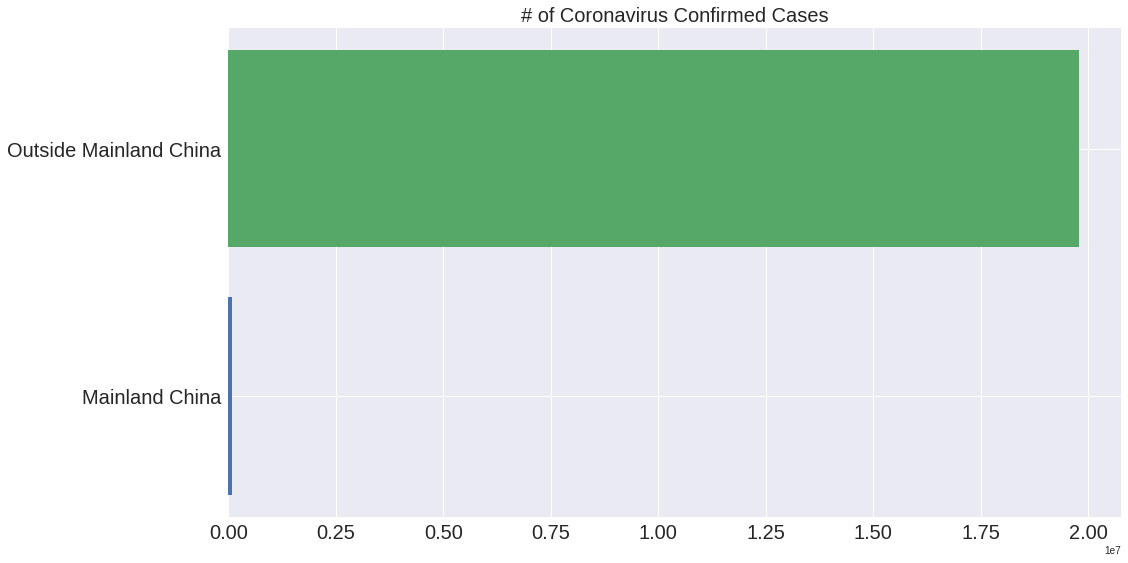

In [ ]:
china_confirmed = latest_confirmed[confirmed_case['Country/Region']=='China'].sum()
outside_mainland_china_confirmed = np.sum(country_confirmed_cases) - china_confirmed
plt.figure(figsize=(16, 9))
plt.barh('Mainland China', china_confirmed)
plt.barh('Outside Mainland China', outside_mainland_china_confirmed)
plt.title('# of Coronavirus Confirmed Cases', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [ ]:
print('Outside Mainland China: {} cases'.format(outside_mainland_china_confirmed))
print('Mainland China: {} cases'.format(china_confirmed))
print('Total: {} cases'.format(china_confirmed+outside_mainland_china_confirmed))

Outside Mainland China: 19772890 cases
Mainland China: 88793 cases
Total: 19861683 cases


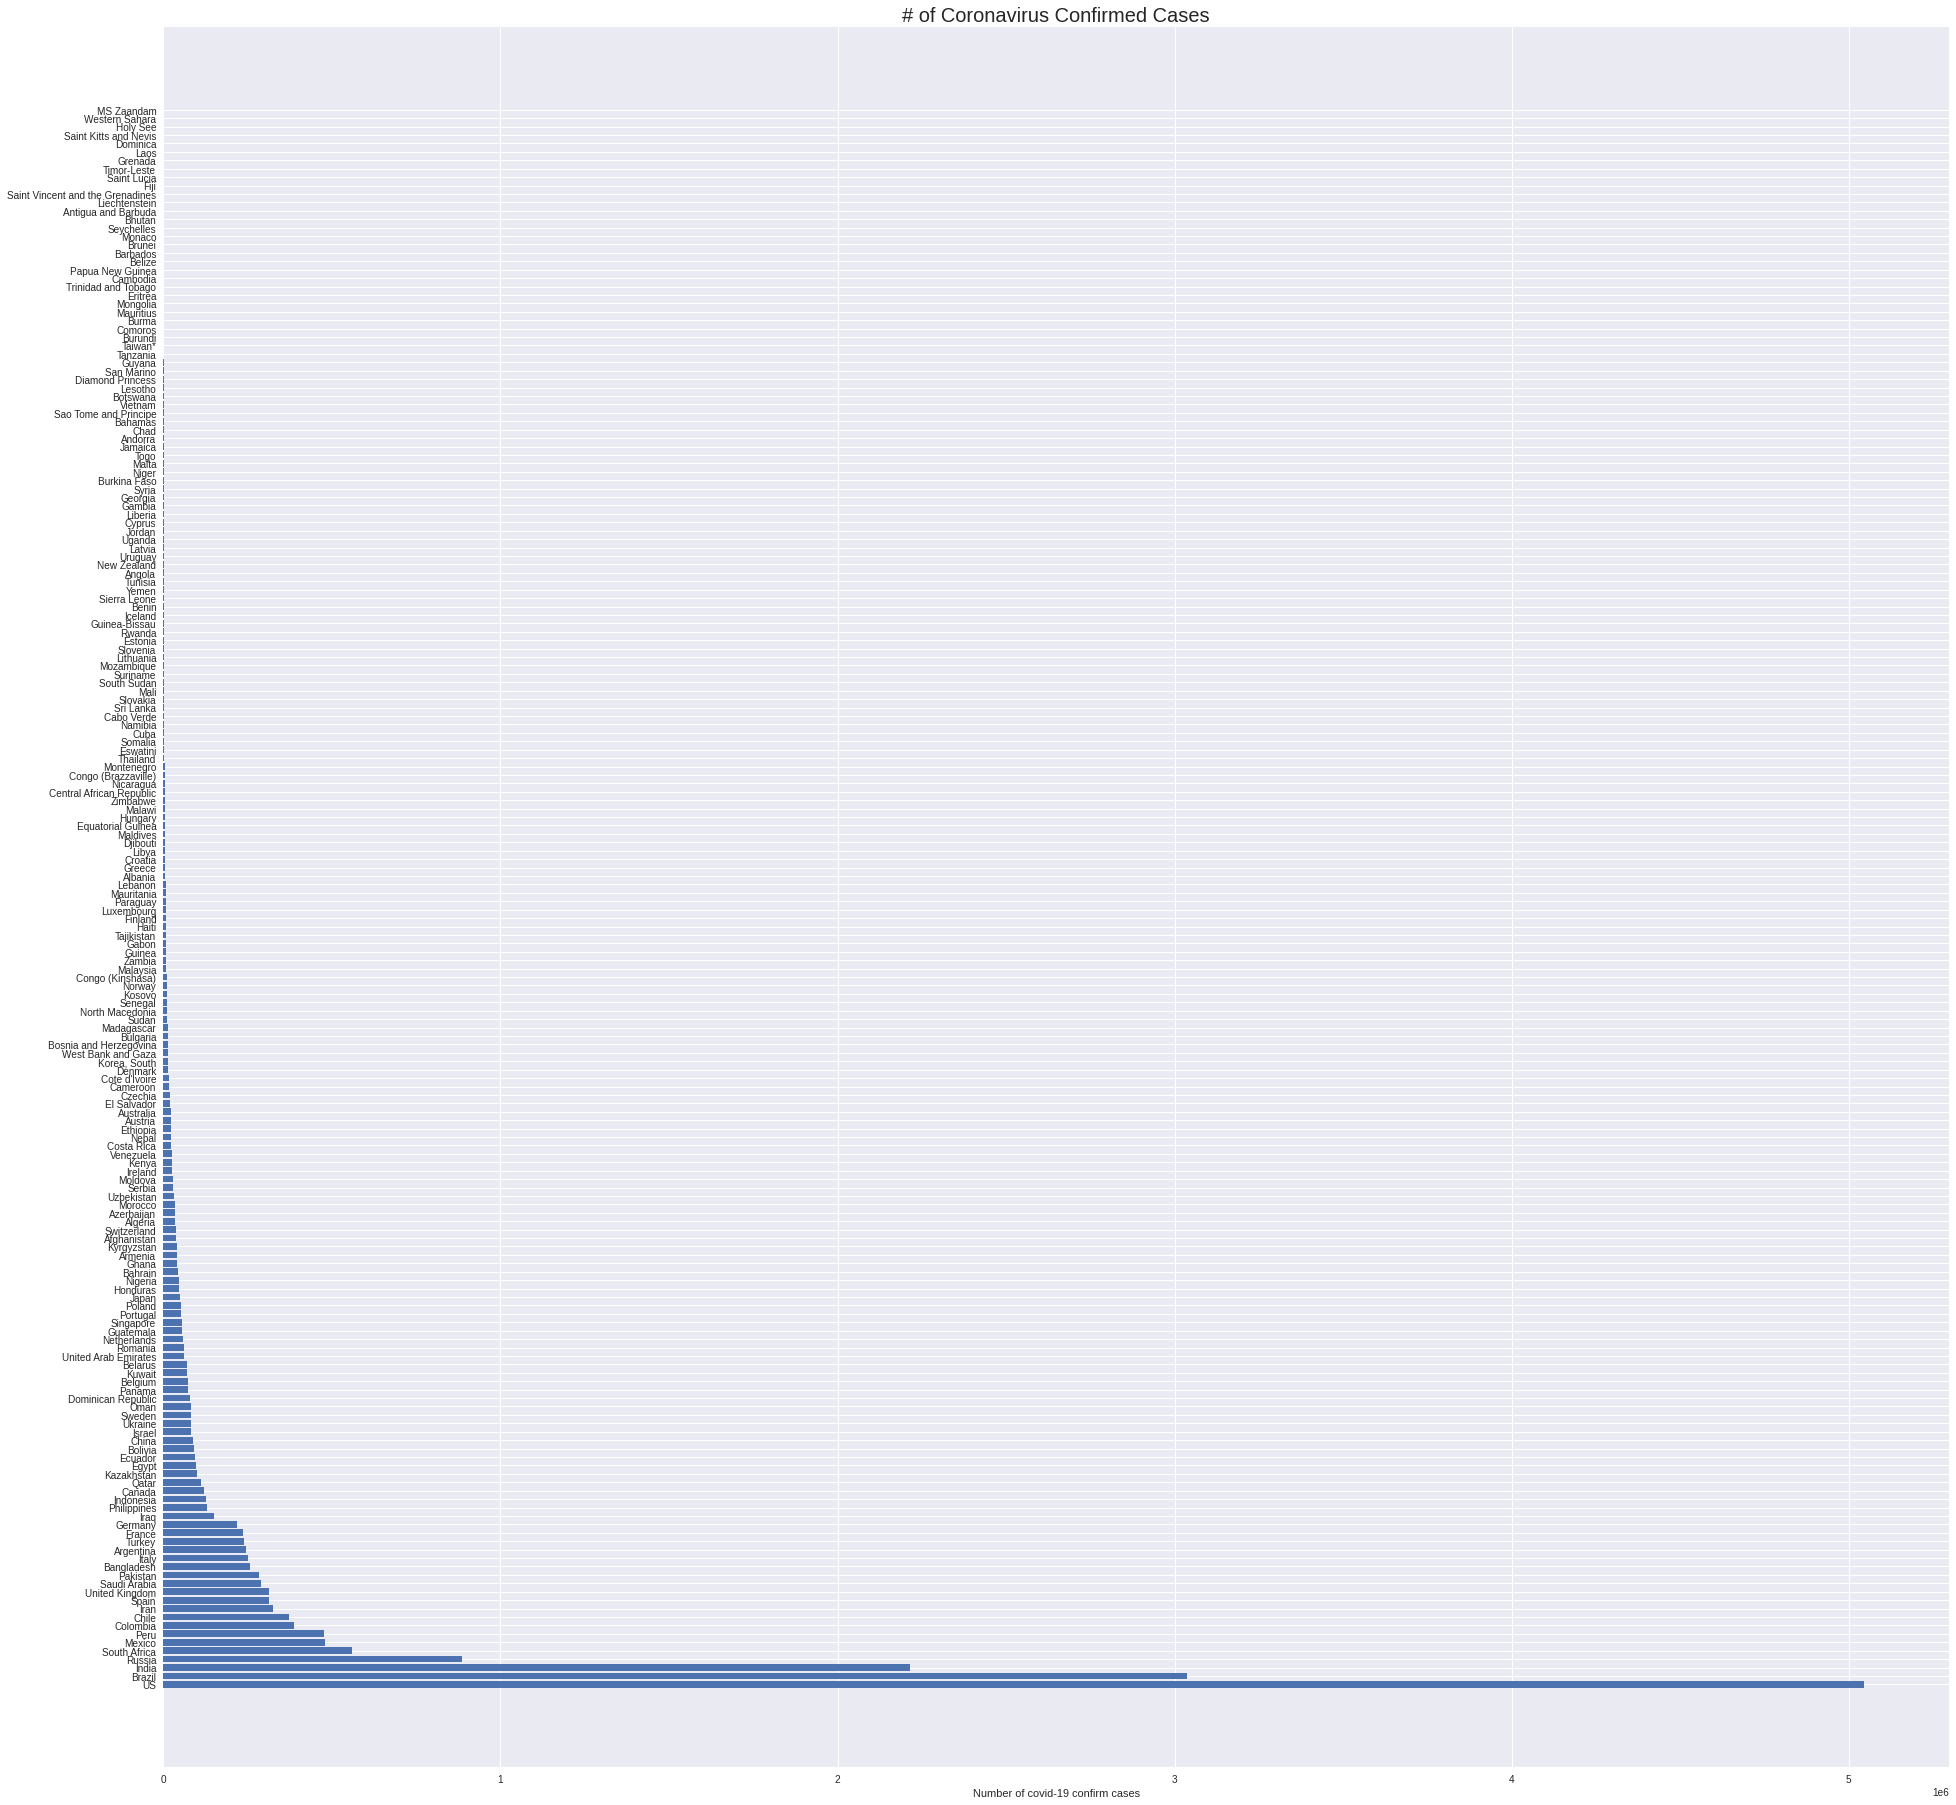

In [ ]:
plt.figure(figsize=(32, 32))
plt.barh(unique_countries, country_confirmed_cases)
plt.title('# of Coronavirus Confirmed Cases', size=20)
plt.xlabel('Number of covid-19 confirm cases')
plt.show()

In [ ]:
# Only show 10 countries with the most confirmed cases, the rest are grouped into the other category
visual_unique_countries = [] 
visual_confirmed_cases = []
others = np.sum(country_confirmed_cases[10:])

for i in range(len(country_confirmed_cases[:10])):
    visual_unique_countries.append(unique_countries[i])
    visual_confirmed_cases.append(country_confirmed_cases[i])
    
visual_unique_countries.append('Others')
visual_confirmed_cases.append(others)

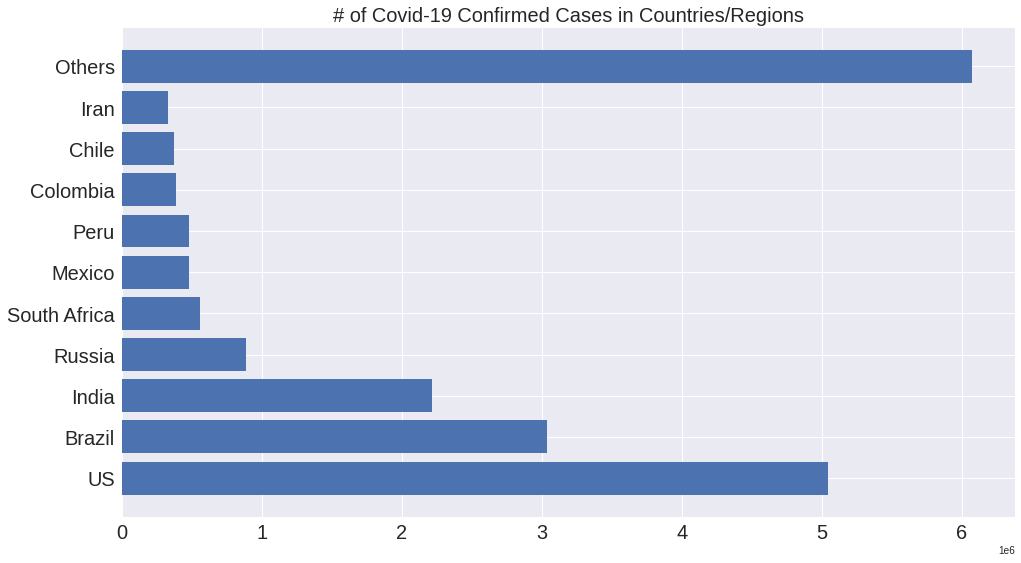

In [ ]:
plt.figure(figsize=(16, 9))
plt.barh(visual_unique_countries, visual_confirmed_cases)
plt.title('# of Covid-19 Confirmed Cases in Countries/Regions', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

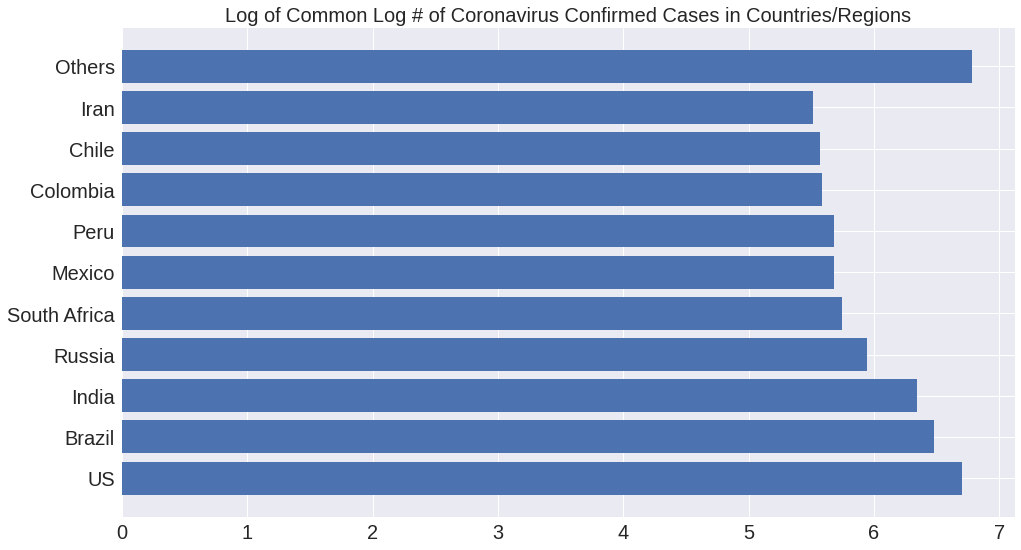

In [ ]:
# lets look at it in a logarithmic scale 
log_country_confirmed_cases = [math.log10(i) for i in visual_confirmed_cases]
plt.figure(figsize=(16, 9))
plt.barh(visual_unique_countries, log_country_confirmed_cases)
plt.title('Log of Common Log # of Coronavirus Confirmed Cases in Countries/Regions', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

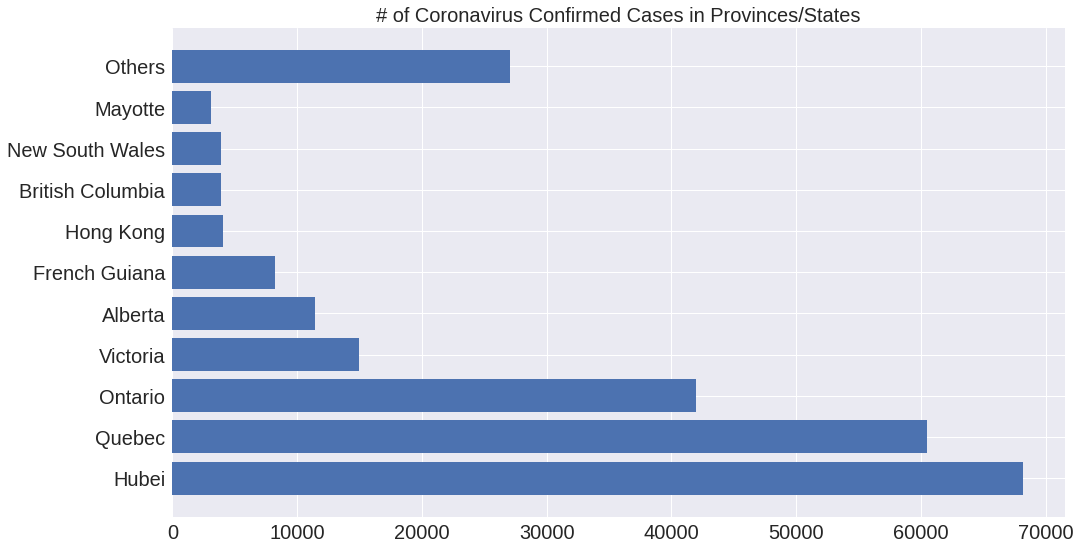

In [ ]:
plt.figure(figsize=(16, 9))
plt.barh(visual_unique_provinces, visual_confirmed_cases2)
plt.title('# of Coronavirus Confirmed Cases in Provinces/States', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

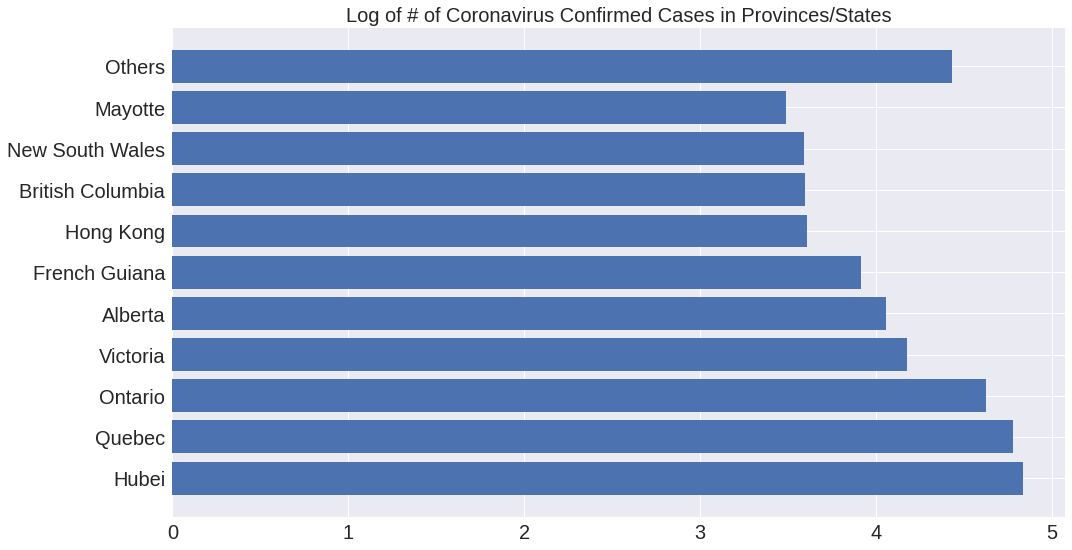

In [ ]:
log_province_confirmed_cases = [math.log10(i) for i in visual_confirmed_cases2]
plt.figure(figsize=(16, 9))
plt.barh(visual_unique_provinces, log_province_confirmed_cases)
plt.title('Log of # of Coronavirus Confirmed Cases in Provinces/States', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

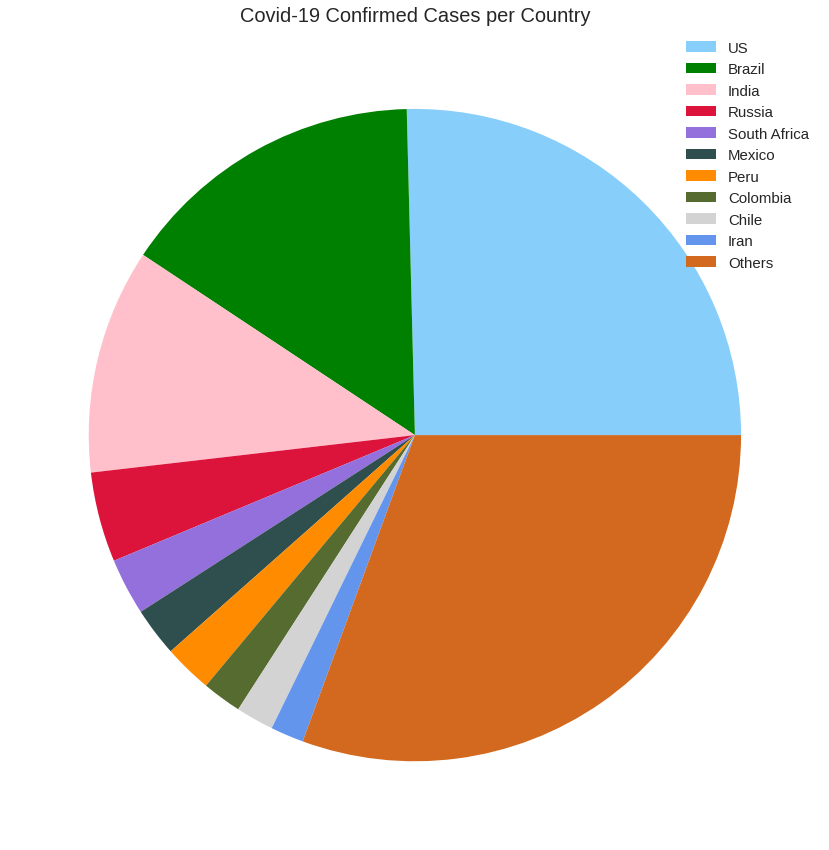

In [ ]:
c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))
plt.figure(figsize=(20,15))
plt.title('Covid-19 Confirmed Cases per Country', size=20)
plt.pie(visual_confirmed_cases, colors=c)
plt.legend(visual_unique_countries, loc='best', fontsize=15)
plt.show()

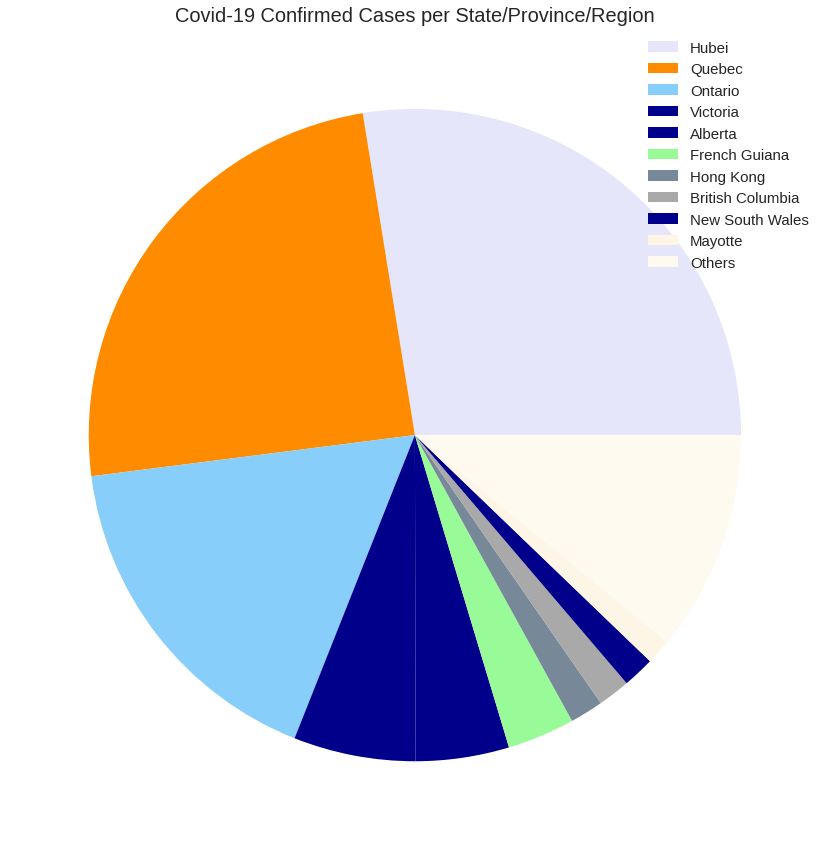

In [ ]:
c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))
plt.figure(figsize=(20,15))
plt.title('Covid-19 Confirmed Cases per State/Province/Region', size=20)
plt.pie(visual_confirmed_cases2, colors=c)
plt.legend(visual_unique_provinces, loc='best', fontsize=15)
plt.show()

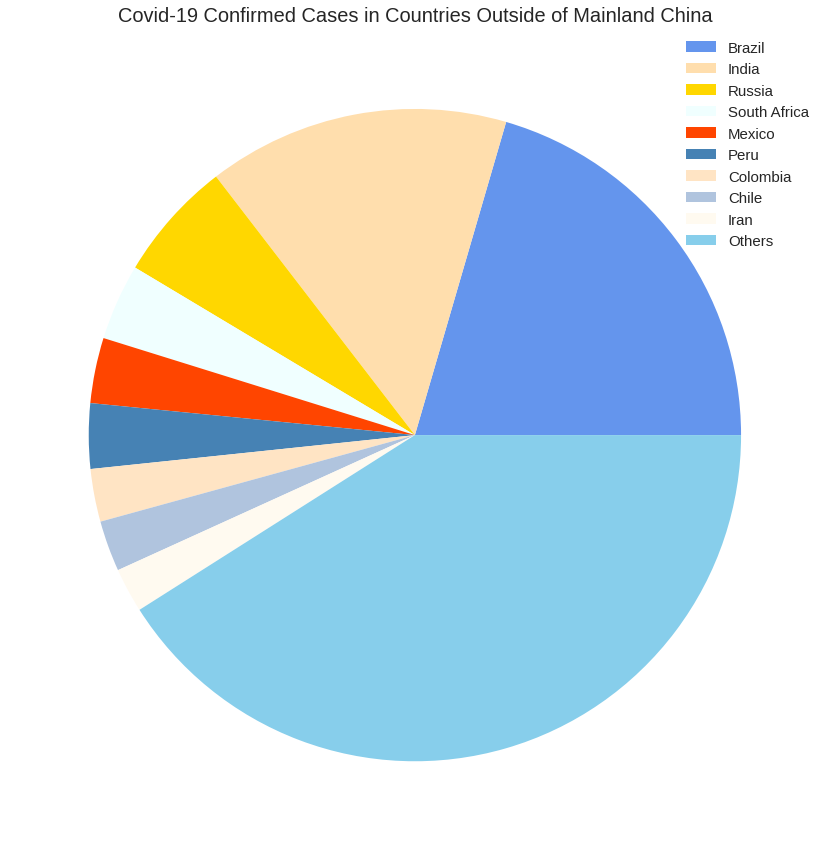

In [ ]:
c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))
plt.figure(figsize=(20,15))
plt.title('Covid-19 Confirmed Cases in Countries Outside of Mainland China', size=20)
plt.pie(visual_confirmed_cases[1:], colors=c)
plt.legend(visual_unique_countries[1:], loc='best', fontsize=15)
plt.show()

In [ ]:
def plot_params(ax,axis_label= None, plt_title = None,label_size=15, axis_fsize = 15, title_fsize = 20, scale = 'linear' ):
    # Tick-Parameters
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.tick_params(which='both', width=1,labelsize=label_size)
    ax.tick_params(which='major', length=6)
    ax.tick_params(which='minor', length=3, color='0.8')

    # Grid
    plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
    plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

    # Plot Title
    plt.title( plt_title,{'fontsize':title_fsize})
    
    # Yaxis sacle
    plt.yscale(scale)
    
    # Plot Axes Labels
    xl = plt.xlabel(axis_label[0],fontsize = axis_fsize)
    yl = plt.ylabel(axis_label[1],fontsize = axis_fsize)

In [ ]:
def visualize_covid_cases(confirmed, deaths,recovered, continent=None , country = None , state = None, period = None, figure = None, scale = "linear"):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10,10))
        # Sub plot
        ax = f.add_subplot(111)
    else :
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1],figure[2],figure[3])
    
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)
    
    stats = [confirmed, recovered, deaths]
    label = ["Confirmed", "Recovered","Deaths"]
    
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["country",country]
    else: 
        params = ["All", "All"]

    for i,stat in enumerate(stats):
        if params[1] == "All" :
            cases = np.sum(np.asarray(stat.iloc[:,4:]),axis = 0)[x:]
        else :
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,4:]),axis = 0)[x:]
        date = np.arange(1,cases.shape[0]+1)[x:]
        plt.plot(date,cases,label = label[i]+" (Total : "+str(cases[-1])+")")

    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:,4:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:,4:]),axis = 0)[x:]
        Total_recovered = np.sum(np.asarray(stats[2].iloc[:,4:]),axis = 0)[x:]
    else :
        Total_confirmed =  np.sum(np.asarray(stats[0][stat[params[0]] == params[1]].iloc[:,4:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1][stat[params[0]] == params[1]].iloc[:,4:]),axis = 0)[x:]
        Total_recovered = np.sum(np.asarray(stats[2][stat[params[0]] == params[1]].iloc[:,4:]),axis = 0)[x:]
    
    text = "From "+stats[0].columns[4]+" to "+stats[0].columns[-1]+"\n"
    text += "Mortality rate : "+ str(int(Total_deaths[-2]/(Total_confirmed[-2])*10000)/100)+"\n"
    text += "Last 5 Days:\n"
    text += "Confirmed  : " + str(Total_confirmed[-2] - Total_confirmed[-7])+"\n"
    text += "Deaths       : " + str(Total_deaths[-2] - Total_deaths[-7])+"\n"
    text += "Recovered : " + str(Total_recovered[-2] - Total_recovered[-7])+"\n"
    text += "Last 24 Hours:\n"
    text += "Confirmed  : " + str(Total_confirmed[-2] - Total_confirmed[-3])+"\n"
    text += "Deaths       : " + str(Total_deaths[-2] - Total_deaths[-3])+"\n"
    text += "Recovered : " + str(Total_recovered[-2] - Total_recovered[-3])+"\n"
    
    plt.text(0.02, 0.78, text, fontsize=14, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))
    
    # Plot Axes Labels
    axis_label = ["Days ("+confirmed_case.columns[4]+" - "+confirmed_case.columns[-1]+")","No of Cases"]
    
    # Plot Parameters
    plot_params(ax,axis_label,scale = scale)
    
    # Plot Title
    if params[1] == "All" :
        plt.title("COVID-19 Cases World",{'fontsize':25})
    else:   
        plt.title("COVID-19 Cases for "+params[0]+" "+params[1] ,{'fontsize':25})
        
    # Legend Location
    l = plt.legend(loc= "best",fontsize = 13)
    
    if figure == None:
        plt.show()

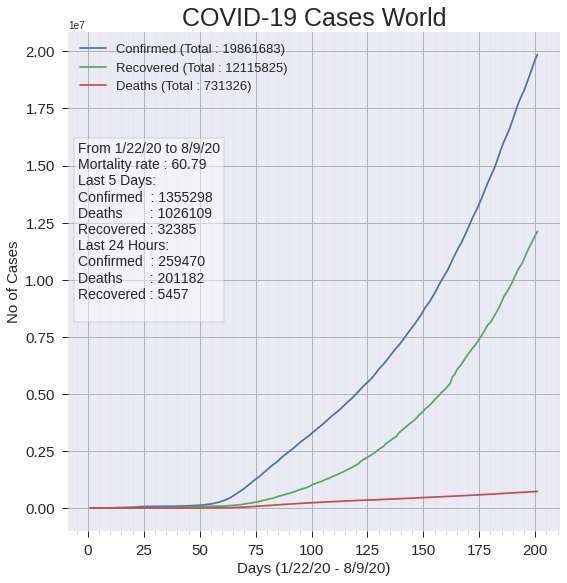

In [ ]:
cols = 1
rows = 1
f = plt.figure(figsize=(10,10*rows))
visualize_covid_cases(confirmed_case, death_reported, recovered_cases,continent = "All",figure = [f,rows,cols, 1])

plt.show()

### SVM to predict future data

In [ ]:
# Spliting data into train and test data

In [ ]:
kernalp = ['poly','sigmoid','rbf']
cp = [0.01,0.1,1,10]
gammap = [0.01,0.1,1]
epsilonp = [0.01,0.1,1]
shrinkingp = [True,False]
# svm_grid = {'kernal':kernal, 'c':c,'gamma':gamma, 'epsilon':epsilon, 'shrinking': shrinking}
distributions = dict(C=cp,
                     kernel = kernalp, gamma = gammap, epsilon = epsilonp, shrinking = shrinkingp)

svm = SVR()
# print(svm.get_params().keys())
#dict_keys(['cv', 'error_score', 'estimator__C', 'estimator__cache_size', 'estimator__coef0', 'estimator__degree', 'estimator__epsilon', 'estimator__gamma', 'estimator__kernel', 'estimator__max_iter', 'estimator__shrinking', 'estimator__tol', 'estimator__verbose', 'estimator', 'iid', 'n_iter', 'n_jobs', 'param_distributions', 'pre_dispatch', 'random_state', 'refit', 'return_train_score', 'scoring', 'verbose'])
svm_search = RandomizedSearchCV(svm,  distributions, scoring='neg_mean_squared_error',cv=3,return_train_score=True,n_jobs =1,n_iter=40,verbose=1)
# print(svm_search.get_params().keys())
svm_search.fit(days_since_1_22, world_casese.ravel())
# world_casese

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed: 92.5min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='scale', kernel='rbf',
                                 max_iter=-1, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='deprecated', n_iter=40, n_jobs=1,
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'epsilon': [0.01, 0.1, 1],
                                        'gamma': [0.01, 0.1, 1],
                                        'kernel': ['poly', 'sigmoid', 'rbf'],
                                        'shrinking': [True, False]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [ ]:
svm_search.best_params_

{'C': 0.1, 'epsilon': 1, 'gamma': 0.01, 'kernel': 'poly', 'shrinking': False}

In [ ]:
svm_confirmed = svm_search.best_estimator_
future_forcast = np.array([i for i in range(len(future_forcast_dates))]).reshape(-1,1)
# print(future_forcast)
svm_pre = svm_confirmed.predict(future_forcast)

In [ ]:
svm_confirmed

SVR(C=0.1, cache_size=200, coef0=0.0, degree=3, epsilon=1, gamma=0.01,
    kernel='poly', max_iter=-1, shrinking=False, tol=0.001, verbose=False)

In [ ]:
svm_pre

array([  130333.23045173,   130335.7432881 ,   130353.33314264,
         130401.07703353,   130494.05197896,   130647.33499709,
         130876.00310611,   131195.1333242 ,   131619.80266952,
         132165.08816026,   132846.0668146 ,   133677.81565071,
         134675.41168676,   135853.93194095,   137228.45343144,
         138814.0531764 ,   140625.80819403,   142678.79550249,
         144988.09211996,   147568.77506463,   150435.92135466,
         153604.60800823,   157089.91204352,   160906.91047872,
         165070.68033199,   169596.29862151,   174498.84236546,
         179793.38858201,   185495.01428936,   191618.79650566,
         198179.8122491 ,   205193.13853786,   212673.85239011,
         220637.03082403,   229097.7508578 ,   238071.08950959,
         247572.12379758,   257615.93073996,   268217.58735489,
         279392.17066055,   291154.75767512,   303520.42541678,
         316504.25090371,   330121.31115408,   344386.68318606,
         359315.44401785,   374922.67066

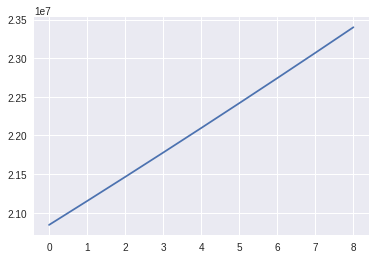

In [ ]:
svm_test_pred = svm_confirmed.predict(future_forcast[-9:])
plt.plot(svm_test_pred)

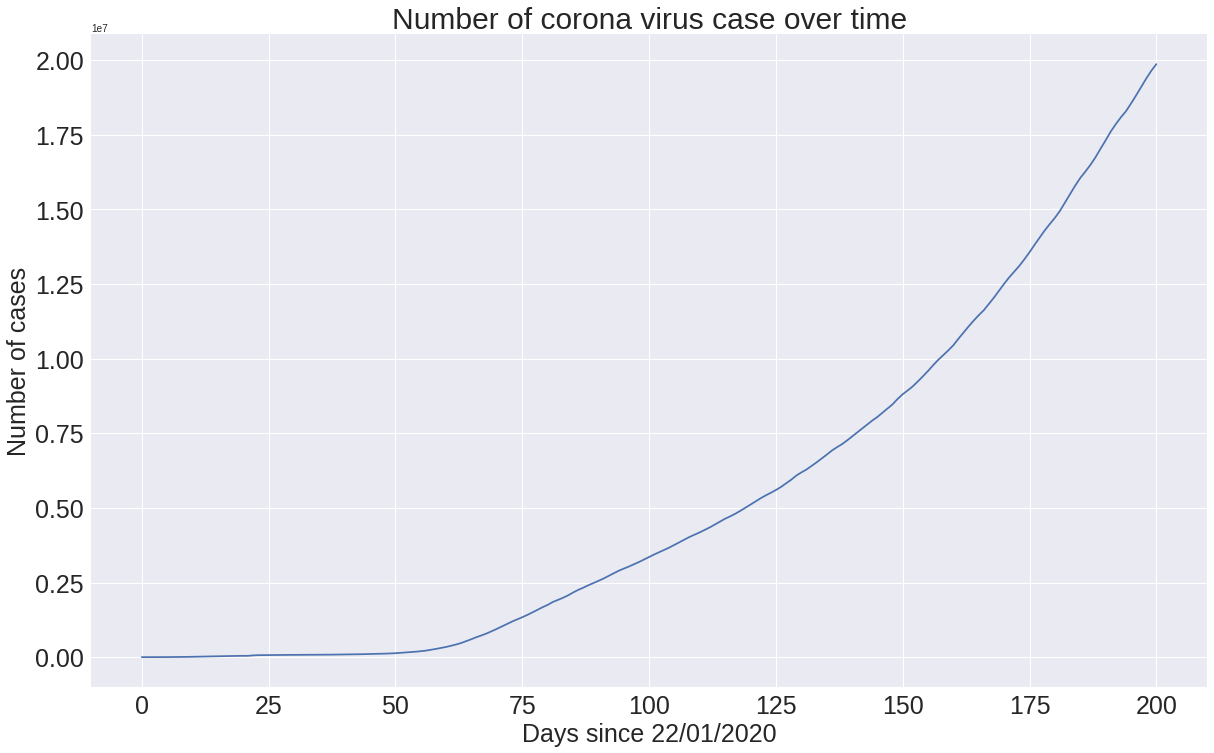

In [ ]:
# Total number of corona cases over the time.

plt.figure(figsize=(20,12))
plt.plot(adjusted_dates, world_casese)
plt.title('Number of corona virus case over time', size = 30)
plt.xlabel('Days since 22/01/2020', size = 25)
plt.ylabel('Number of cases', size=25)
plt.xticks(size = 25)
plt.yticks(size = 25)
plt.show()

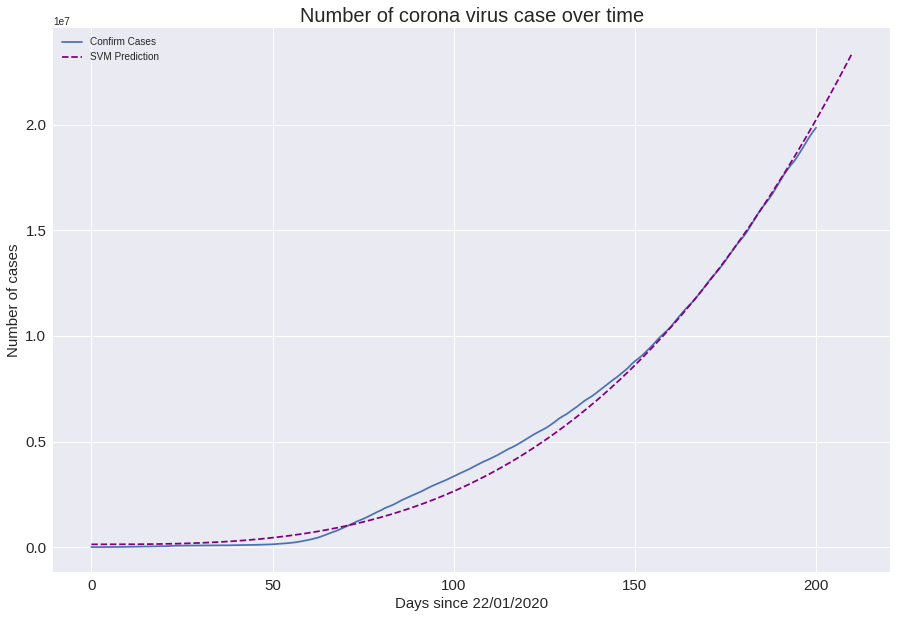

In [ ]:
# Total number of corona cases over the time.

plt.figure(figsize=(15,10))
plt.plot(adjusted_dates, world_casese)
plt.plot(future_forcast,svm_pre,linestyle='dashed', color='purple')
plt.title('Number of corona virus case over time', size = 20)
plt.xlabel('Days since 22/01/2020', size = 15)
plt.ylabel('Number of cases', size=15)
plt.legend(['Confirm Cases', 'SVM Prediction'])
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

In [ ]:
#prediction for next 10 days using svm

print('SVM future prediction')
set(zip(future_forcast_dates[-10:],svm_pre[-10:]))

SVM future prediction


{('08/10/2020', 20536074.711573284),
 ('08/11/2020', 20842155.770424977),
 ('08/12/2020', 21151282.386948254),
 ('08/13/2020', 21463469.638161577),
 ('08/14/2020', 21778732.601083007),
 ('08/15/2020', 22097086.35273075),
 ('08/16/2020', 22418545.97012318),
 ('08/17/2020', 22743126.530278035),
 ('08/18/2020', 23070843.11021385),
 ('08/19/2020', 23401710.786948748)}

In [ ]:
# Prediction using linear regression

from sklearn.linear_model import LinearRegression

linear_model = LinearRegression(normalize=True, fit_intercept=True)
linear_model.fit(days_since_1_22, world_casese.ravel())
test_linear_prediction = linear_model.predict(future_forcast[:-9])
linear_pre = linear_model.predict(future_forcast[-9:])


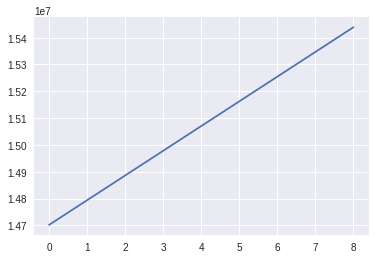

In [ ]:
plt.plot(linear_pre)
# plt.plot()